## **Analysis of Movie Profitability Based on Runtime and Release Date.**

---


In the age of easily available entertainment, with streaming services and internet widely available to the public, I wanted to investigate how factors such as runtime and release date relate to the profitability of movies. The goal of this project is to give insights into whether runtime of movies has an impact on their profits as well as whether and how the release year of a movie might be related to the profit it makes, to help movie makers make better informed decisions when investing in new projects and marketers run more successful campaigns.

In [ ]:
# Import packages to be used for this analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### **Dataset to be used for this project:**

**Source:**  https://www.kaggle.com/datasets/akshaypawar7/millions-of-movies

**Note:** The data has been processed and cleaned in Excel prior to being uploaded to Google Drive for further analysis done for this project (cleaned dataset link https://drive.google.com/file/d/1SpHZXvYKKhHVE9iodR1m6H0wH3_QW4xL/view?usp=sharing )

The dataset consists of 9972 records across 16 fields.
This project will focus on the analysis of movies released from 1972 up to 2022.


**Note:** Data file is also hosted at this link, make sure to download it to your local computer and connect it to your Colab. https://drive.google.com/file/d/1SpHZXvYKKhHVE9iodR1m6H0wH3_QW4xL/view?usp=sharing

In [ ]:
#Load dataset movies
movies = pd.read_csv('/content/gdrive/MyDrive/DAI 2022/CAP3/movies copy_1.csv')

In [ ]:
#Explore dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9972 entries, 0 to 9971
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9972 non-null   int64  
 1   title                 9972 non-null   object 
 2   genres                9739 non-null   object 
 3   original_language     9972 non-null   object 
 4   overview              9787 non-null   object 
 5   popularity            9972 non-null   float64
 6   production_companies  9367 non-null   object 
 7   release_date          9792 non-null   object 
 8   budget                9972 non-null   int64  
 9   revenue               9972 non-null   int64  
 10  profit                9972 non-null   int64  
 11  runtime               9948 non-null   float64
 12  status                9972 non-null   object 
 13  tagline               7586 non-null   object 
 14  vote_average          9972 non-null   float64
 15  vote_count           

In [ ]:
#Clean dataset, drop duplicates
clean_movies=movies.drop_duplicates(['title','release_date'])

In [ ]:
#Convert release_date column to a datetime format
clean_movies['release_date']=pd.to_datetime(clean_movies['release_date'])

In [ ]:
#Add a year column, by extracting the year from release_date
clean_movies['year'] = clean_movies['release_date'].dt.year

In [ ]:
#Filter dataset to only the released movies up to year 2022
clean_movies_df = clean_movies.loc[(clean_movies['status']=="Released")&(clean_movies['year']<=2022)]

In [ ]:
#Explore cleaned dataset
clean_movies_df.info()
clean_movies_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8503 entries, 0 to 9971
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    8503 non-null   int64         
 1   title                 8503 non-null   object        
 2   genres                8434 non-null   object        
 3   original_language     8503 non-null   object        
 4   overview              8413 non-null   object        
 5   popularity            8503 non-null   float64       
 6   production_companies  8146 non-null   object        
 7   release_date          8503 non-null   datetime64[ns]
 8   budget                8503 non-null   int64         
 9   revenue               8503 non-null   int64         
 10  profit                8503 non-null   int64         
 11  runtime               8493 non-null   float64       
 12  status                8503 non-null   object        
 13  tagline           

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,profit,runtime,status,tagline,vote_average,vote_count,year
0,19995,Avatar,Action-Adventure-Fantasy-Science Fiction,en,In the 22nd century a paraplegic Marine is dis...,626.641,20th Century Fox-Ingenious Media-Dune Entertai...,2009-12-10,237000000,2847246203,2610246203,162.0,Released,Enter the world of Pandora.,7.516,25948,2009.0
1,299534,Avengers: Endgame,Adventure-Science Fiction-Action,en,After the devastating events of Avengers: Infi...,173.113,Marvel Studios,2019-04-24,356000000,2797800564,2441800564,181.0,Released,Avenge the fallen.,8.278,21674,2019.0
2,597,Titanic,Drama-Romance,en,101-year-old Rose DeWitt Bukater tells the sto...,156.905,Paramount-20th Century Fox-Lightstorm Entertai...,1997-11-18,200000000,2187463944,1987463944,194.0,Released,Nothing on Earth could come between them.,7.877,21405,1997.0
3,140607,Star Wars: The Force Awakens,Adventure-Action-Science Fiction-Fantasy,en,Thirty years after defeating the Galactic Empi...,80.426,Lucasfilm Ltd.-Bad Robot,2015-12-15,245000000,2068223624,1823223624,136.0,Released,Every generation has a story.,7.317,17258,2015.0
4,299536,Avengers: Infinity War,Adventure-Action-Science Fiction,en,As the Avengers and their allies have continue...,303.628,Marvel Studios,2018-04-25,300000000,2046239637,1746239637,149.0,Released,An entire universe. Once and for all.,8.267,25292,2018.0


### **Hypothesis #1**
Some avid movie watchers consider a movie length of 60-120 mins ideal, and critisize movies over 120 mins. Do movies with higher than ideal (120 mins) runtime make more or less money on average than those that are between 60 and 120 mins? (Reference - https://yougov.co.uk/topics/society/articles-reports/2015/09/26/note-producers-perfect-movie-length-under-2-hours)

**Hypothesis:** There is a statistically significant difference between profits of movies that are longer than 120 minutes and movies that are between 60 and 120 minutes.


*   **H0:** There is no statistically significant difference
between profits of movies that are longer than 120 minutes and movies that are between 60 and 120 minutes.
*  **H1:** There is a statistically significant difference between profits of movies that are longer than 120 minutes and movies that are between 60 and 120 minutes.


In [ ]:
#Split the data for a t-test
short_movies_df = clean_movies_df.loc[(clean_movies_df['runtime'].between(60,120))]


In [ ]:
#Check for accuracy
short_movies_df.head(5)
short_movies_df.sort_values(by='runtime', ascending=True)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,profit,runtime,status,tagline,vote_average,vote_count,year
6143,563508,Temptation,Drama-Romance,en,Opera singer Renee Dupree is in love with stru...,1.461,Jesse L. Lasky Feature Play Company,2015-12-15,22472,102437,79965,60.0,Released,NaN,0.000,0,2015.0
6710,925577,FLOWER HOUR,NaN,en,60 shorts. 60 minutes. FLOWER HOUR is a psyche...,0.600,@lilyellowtags,2021-10-22,1000,1200,200,60.0,Released,60 psychedelic blasts. One hour. Can you survive?,0.000,0,2021.0
5907,274175,Buddha Wild: Monk in a Hut,Adventure-Comedy-Documentary-Family,en,Buddhist monks open up about the joys and chal...,1.793,Carpe Diem Films,2008-04-16,25000,275000,250000,60.0,Released,NaN,10.000,1,2008.0
6324,266455,D'Unbelievables D'Mother,Comedy,en,Irish Comedy starring Jon Kenny &amp; Pat Shortt,0.600,NaN,2001-02-11,20000,50000,30000,60.0,Released,NaN,8.700,3,2001.0
6081,628637,The Dark Days of Demetrius,Horror,en,The Dark Days of Demetrius is the sixth full l...,1.151,R.A. Productions,2019-09-23,10000,100000,90000,60.0,Released,"I'm gonna live stream your death, for the whol...",8.000,1,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,423628,Believe,Drama,en,A small-town business owner tries to save the ...,2.913,Believe the Film / Power of 3,2016-12-02,3500000,890303,-2609697,120.0,Released,"When everything seems lost, hope can find you.",7.100,16,2016.0
7945,326011,The Battalion,War-Action-Drama-History,ru,Russia 1917 WWI. This is the story of the 1st ...,5.033,Art Pictures Studio-Corner Work,2015-02-20,10000000,7547762,-2452238,120.0,Released,First. Women's. Immortal.,7.300,30,2015.0
7919,10675,Frantic,Thriller-Crime-Mystery,en,The wife of an American doctor suddenly vanish...,17.068,Warner Bros. Pictures,1988-02-16,20000000,17637950,-2362050,120.0,Released,They've taken his wife. Now he's taking action.,6.700,789,1988.0
8026,9952,Rescue Dawn,Adventure-Drama-War,en,A US Fighter pilot's epic struggle of survival...,13.368,Metro-Goldwyn-Mayer,2006-09-09,10000000,7177143,-2822857,120.0,Released,A true story of survival... declassified.,6.900,977,2006.0


In [ ]:
#Split the data for a t-test, 2nd set
long_movies_df = clean_movies_df.loc[(clean_movies_df['runtime']>=121)]


In [ ]:
#Check for accuracy
long_movies_df.head(5)
long_movies_df.sort_values(by='runtime', ascending=True)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,profit,runtime,status,tagline,vote_average,vote_count,year
9807,9311,Smilla's Sense of Snow,Action-Crime-Drama-Mystery-Thriller,en,Smilla Jaspersen half Danish half Greenlander ...,9.541,Bavaria Film-Fox Searchlight Pictures,1997-02-28,35000000,2372903,-32627097,121.0,Released,Some Tracks Should Never Be Uncovered.,6.4,186,1997.0
977,846,The X Files,Mystery-Science Fiction-Thriller,en,Mulder and Scully now taken off the FBI's X Fi...,19.533,20th Century Fox-Ten Thirteen Productions,1998-06-19,66000000,189198313,123198313,121.0,Released,Fight the Future,6.8,1277,1998.0
8474,28463,East/West,Drama-Romance,fr,June 1946: Stalin invites Russian emigres to r...,3.490,UGC YM-France 3 Cinéma-NTV-Profit,1999-09-01,11500000,6032000,-5468000,121.0,Released,NaN,6.9,45,1999.0
1056,9946,End of Days,Action-Fantasy-Horror-Mystery,en,On 28 December 1999 the citizens of New York C...,22.632,Beacon Communications,1999-11-24,100000000,211989043,111989043,121.0,Released,Prepare for the end.,6.0,1472,1999.0
9856,9824,Mystery Men,Adventure-Fantasy-Action-Comedy-Science Fiction,en,When Champion City's hero Captain Amazing is k...,9.858,Universal Pictures-Dark Horse Entertainment-Go...,1999-08-06,68000000,29762011,-38237989,121.0,Released,"We're not your classic heroes, we're the other...",5.8,659,1999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839,628770,Sons of Apollo: Live With The Plovdiv Psychoti...,Music,en,Filmed at the spectacular Roman Amphitheatre i...,1.254,NaN,2019-08-30,1000000,10000000,9000000,278.0,Released,"“Fuck the term ‘supergroup’, that’s not what t...",8.7,3,2019.0
6634,483103,Kemis Yelebesku'let,NaN,en,Kemis Yelebesku'let is a drama film about fami...,0.600,NaN,2014-01-12,1000,3000,2000,300.0,Released,NaN,0.0,0,2014.0
3836,314696,Def Comedy Jam Classics: Volume Two,Comedy,en,Long before Hollywood came calling with films ...,1.946,HBO,2006-11-21,1000000,10000000,9000000,300.0,Released,Def Comedy Jam Classics: Volume Two Hosted by...,0.0,0,2006.0
9483,43434,Carlos,Crime-Drama-Thriller-History,en,The story of Venezuelan revolutionary Ilich Ra...,13.934,ARTE France Cinéma-Canal+-CNC-PROCIREP-StudioC...,2010-07-07,18000000,871279,-17128721,339.0,Released,The man who hijacked the world,7.0,150,2010.0


In [ ]:
#Compare sample sizes
short_movies_df.info()
long_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6192 entries, 7 to 9971
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    6192 non-null   int64         
 1   title                 6192 non-null   object        
 2   genres                6176 non-null   object        
 3   original_language     6192 non-null   object        
 4   overview              6177 non-null   object        
 5   popularity            6192 non-null   float64       
 6   production_companies  5978 non-null   object        
 7   release_date          6192 non-null   datetime64[ns]
 8   budget                6192 non-null   int64         
 9   revenue               6192 non-null   int64         
 10  profit                6192 non-null   int64         
 11  runtime               6192 non-null   float64       
 12  status                6192 non-null   object        
 13  tagline           

 **Note:** Since central limit theorem says that the sampling distribution of the mean will always be normally distributed, as long as the sample size is large enough (over 100) and the sample sizes are:
*  short_movies_df - 6192 records
*  long_movies_df - 2051 records

This study will consider the samples to be normally distributed.

In [ ]:
#Run two sample t-test
stats.ttest_ind(short_movies_df['profit'], long_movies_df['profit'])

Ttest_indResult(statistic=-15.311937821905836, pvalue=3.315625384341255e-52)

### **Summary of findings for hypothesis #1:**
The p value is 3.315625384341255e-52, therefore **the null hypothesis is rejected**.

Given the results of the t-test, we can conclude that there is a statistically significant difference in profit in movies that are 60-120 minutes long, and movies over 120 mins.

In [ ]:
#Descriptive statistics of short_movies_df
short_movies_df.describe()


,id,popularity,budget,revenue,profit,runtime,vote_average,vote_count,year
count,6192.000000,6192.000000,6.192000e+03,6.192000e+03,6.192000e+03,6192.000000,6192.000000,6192.000000,6192.000000
mean,138296.663921,25.820829,2.285157e+07,5.869449e+07,3.584293e+07,99.861757,6.120563,1300.012435,2004.458172
std,194399.632740,101.962210,3.218907e+07,1.162969e+08,9.688024e+07,11.098942,1.408259,2223.605273,11.388481
min,5.000000,0.600000,1.000000e+03,1.200000e+03,-2.988970e+08,60.000000,0.000000,0.000000,1972.000000
25%,10559.750000,7.491500,3.500000e+06,2.115389e+06,-2.407134e+06,92.000000,5.700000,101.000000,1997.000000
50%,30100.000000,12.631000,1.200000e+07,1.617555e+07,3.002962e+06,100.000000,6.300000,452.000000,2007.000000
75%,238818.000000,24.343500,2.840773e+07,6.140076e+07,3.451287e+07,108.000000,6.800000,1453.500000,2014.000000
max,964609.000000,5207.555000,5.000000e+08,1.667635e+09,1.407635e+09,120.000000,10.000000,27115.000000,2022.000000


In [ ]:
#Descriptive statistics of long_movies_df
long_movies_df.describe()

,id,popularity,budget,revenue,profit,runtime,vote_average,vote_count,year
count,2051.000000,2051.000000,2.051000e+03,2.051000e+03,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000
mean,169762.450024,36.441384,3.867001e+07,1.275601e+08,8.889008e+07,139.674305,6.686914,2429.941492,2006.514383
std,209214.744990,136.712997,5.328353e+07,2.528250e+08,2.144558e+08,20.395318,1.251924,4320.558672,11.011797
min,11.000000,0.600000,1.000000e+03,2.000000e+03,-1.580311e+08,121.000000,0.000000,0.000000,1972.000000
25%,9520.000000,5.930000,4.500000e+06,5.776839e+06,0.000000e+00,126.000000,6.300000,59.500000,2000.000000
50%,49529.000000,12.759000,1.800000e+07,2.870000e+07,9.130000e+06,134.000000,6.876000,538.000000,2009.000000
75%,322629.000000,27.641000,5.000000e+07,1.292229e+08,7.700550e+07,147.000000,7.367000,2712.500000,2015.000000
max,967614.000000,2829.379000,3.800000e+08,2.847246e+09,2.610246e+09,480.000000,10.000000,32169.000000,2022.000000


Text(0.5, 1.0, 'Movie profits depending on runtime')

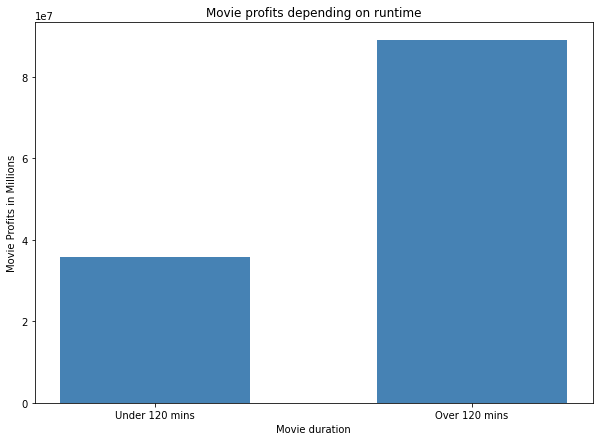

In [ ]:
#Bar graph, showing the difference between the means of the datasets short_movies_df and long_movies_df

short_movies_mean = 3.584293e+07
long_movies_mean = 8.889008e+07
data = {'Under 120 mins':short_movies_mean, 'Over 120 mins':long_movies_mean}
labels = list(data.keys())
values = list(data.values())

plt.figure(figsize=(10,7))
plt.bar(labels,values, color = 'steelblue', width = .6)
plt.xlabel("Movie duration")
plt.ylabel("Movie Profits in Millions")
plt.title("Movie profits depending on runtime")

### **Recommendation**

Based on the findings of this test, I would recommend additional research into how movie genres are related to their profits, but the overall trend suggests that movie directors and studios should continue investing in longer films, since they do tend to be more profitable than shorter ones.

### **Hypothesis #2**

**Hypothesis:** Since Netflix and other streaming services became available and increasingly popular since 2000, did movies released after 2000 generate less or more profit? Is there a statistically significant correlation between the release date (by year) and movie profits?


*   **H0:** There is no statistically significant correlation between the release date and movies' profits.
*  **H1:** There is a statistically significant correlation between the release date and movies' profits.

In [ ]:
#Check whether there are nulls in the relevant columns ('year' and 'profit')
clean_movies_df.isnull().sum()

id                         0
title                      0
genres                    69
original_language          0
overview                  90
popularity                 0
production_companies     357
release_date               0
budget                     0
revenue                    0
profit                     0
runtime                   10
status                     0
tagline                 1850
vote_average               0
vote_count                 0
year                       0
dtype: int64

In [ ]:
#Clean data for a correlation test, change year cloumn from float type to integer type
clean_movies_df['year']=clean_movies_df['year'].astype(int)

In [ ]:
#Check dataset
clean_movies_df.info()
clean_movies_df.head(5)
clean_movies_df.sort_values(by='year', ascending=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8503 entries, 0 to 9971
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    8503 non-null   int64         
 1   title                 8503 non-null   object        
 2   genres                8434 non-null   object        
 3   original_language     8503 non-null   object        
 4   overview              8413 non-null   object        
 5   popularity            8503 non-null   float64       
 6   production_companies  8146 non-null   object        
 7   release_date          8503 non-null   datetime64[ns]
 8   budget                8503 non-null   int64         
 9   revenue               8503 non-null   int64         
 10  profit                8503 non-null   int64         
 11  runtime               8493 non-null   float64       
 12  status                8503 non-null   object        
 13  tagline           

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,profit,runtime,status,tagline,vote_average,vote_count,year
867,756999,The Black Phone,Horror-Thriller,en,Finney Blake a shy but clever 13-year-old boy ...,1601.400,Universal Pictures-Blumhouse Productions-Crook...,2022-06-22,18800000,157000000,138200000,103.0,Released,Never talk to strangers.,7.941,2225,2022
6336,944450,Night Where People Oughta Die 8,Horror,en,4 years have passed. Gab- I mean Detective Jas...,0.654,very good movies,2022-02-20,92000,120000,28000,13.0,Released,NaN,10.000,1,2022
9789,366672,Paws of Fury: The Legend of Hank,Family-Comedy-Animation-Action,en,A hard-on-his-luck hound finds himself in a to...,105.312,Brooksfilms Ltd.-Nickelodeon Movies-Mass Anima...,2022-07-14,45000000,13800000,-31200000,98.0,Released,Time to mark some territory.,6.721,86,2022
567,338953,Fantastic Beasts: The Secrets of Dumbledore,Fantasy-Adventure-Action,en,Professor Albus Dumbledore knows the powerful ...,656.894,Warner Bros. Pictures-Heyday Films,2022-04-06,200000000,405161334,205161334,142.0,Released,Return to the magic.,6.852,2653,2022
7691,927365,The force of nature humanity,Drama,fa,This film shows the positive realities of soci...,1.084,NaN,2022-01-05,1500000,15000,-1485000,10.0,Released,The force of nature humanity,6.400,5,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,15573,The Cowboys,Western-Adventure-Drama-Action,en,When his cattlemen abandon him for the gold fi...,15.724,Warner Bros. Pictures-Sanford Productions (III),1972-01-13,6000000,7500000,1500000,131.0,Released,All they wanted was their chance to be men... ...,7.200,180,1972
2793,12593,Fritz the Cat,Animation-Comedy-Drama,en,A swinging hypocritical college student cat ra...,9.678,Cinemation Industries-Steve Krantz Productions...,1972-04-12,850000,25000000,24150000,78.0,Released,"We're not rated X for nothin', baby!",6.100,231,1972
1409,551,The Poseidon Adventure,Action-Adventure-Thriller,en,When their ocean liner capsizes a group of pas...,18.947,20th Century Fox-Kent Productions,1972-12-13,5000000,84563118,79563118,117.0,Released,"Hell, upside down.",7.100,669,1972
4247,692,Pink Flamingos,Comedy-Crime,en,Notorious Baltimore criminal and underground f...,11.806,New Line Cinema-Dreamland Productions,1972-03-17,12000,6000000,5988000,92.0,Released,An exercise in poor taste,6.251,370,1972


In [ ]:
#Run Pearson r test to check for correlation
stats.pearsonr(clean_movies_df['year'],clean_movies_df['profit'])

(0.06635645333328641, 9.085837637449848e-10)

### **Summary of findings for hypothesis #2:**
The p value is 9.085837637449848e-10, and the correlation coefficient is 0.06635645333328641, therefore **the null hypothesis is rejected**.

Given the results of the Pearson r test, we can conclude that there is a small correlation between the release date and movies' profits, but it exists.

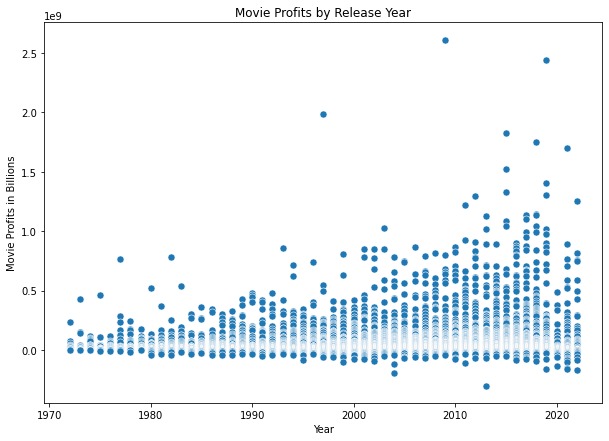

In [ ]:
#Scatterplot of the correlation between the release year and profit
plt.figure(figsize=(10,7))
sns.scatterplot(x=clean_movies_df['year'], y=clean_movies_df['profit'], s=50)
plt.xlabel("Year")
plt.ylabel("Movie Profits in Billions")
plt.title('Movie Profits by Release Year')
plt.show()

### **Recommendation**

Based on the findings of this test, I would recommend additional research into the distribution channels, these movies are currently on (since the dataset includes bot movies in English and a variety of other languages) and what their projected profits are likely to be, since it is likely that recently released movies will continue generating revenue, therefore potentially making this correlation even stronger.

Another important factor to consider is whether this data accounts for inflation, and if it does not, how does inflation skew these results?

It appears that there is not a big enough correlation betwen the two variables to claim that new movies are indeed a more profitable investment than older ones. Therefore I would recommend doing the aforementioned research before investing into new releases.